Beskrivande analys  
**Räkna ut medel, median, min och max för: age, weight, height, systolic_bp, cholesterol.**
**Skapa minst 3 olika grafer (t.ex. histogram över blodtryck, boxplot över vikt per kön, stapeldiagram över andelen rökare).**

### Simulering kopplad till caset (använd numpy.random + seed)
- Beräkna andelen personer i datasetet som har sjukdomen.
- Använd numpy för att simulera 1000 slumpade personer med samma sannolikhet för sjukdom.
- Jämför den simulerade andelen med den verkliga andelen i datasetet.
### Konfidensintervall
- Beräkna ett konfidensintervall för medelvärdet av systolic_bp (t.ex. med normalapproximation eller bootstrap, som vi gått igenom på kursen).
### Hypotesprövning
- Testa hypotesen: ”Rökare har högre medel-blodtryck än icke-rökare.”
- Använd en av metoderna vi gått igenom (t.ex. bootstrap eller enkel t-test-funktion).
- Förklara kort resultatet i en markdown-ruta.

För VG ska du även göra:

- Beräkna konfidensintervallet med två olika metoder (t.ex. normalapproximation och bootstrap) och jämför resultaten.
- Gör en simulering för att undersöka hur säkert ditt hypotes­test är (t.ex. hur ofta testet hittar en skillnad när den finns → power).
- Motivera dina metodval i markdown och hänvisa till dokumentation eller annan källa.

Inlämning Del 1: Notebook på GitHub i branch del1

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import src.metrics as M 
import src.viz as V 


In [2]:
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"

In [3]:
df_start = pd.read_csv("data/health_study_dataset.csv")
# display(df_start.head())
# display(df_start.info())
# display(df_start.describe())
# dup_mask = df_start.duplicated(keep=False)
# dup_mask.sum()


In [4]:
df = df_start.copy()
df["sex"] = df["sex"].astype("category")
df["smoker"] = df["smoker"].astype("category")
# df.info()

In [5]:
stats = df[["age", "weight", "height", "systolic_bp", "cholesterol"]].agg(
    ["mean", "median", "min", "max"]
).round(2)
stats

,age,weight,height,systolic_bp,cholesterol
mean,49.43,73.41,171.85,149.18,4.93
median,50.00,73.20,171.35,149.40,4.97
min,18.00,33.70,144.40,106.80,2.50
max,90.00,114.40,200.40,185.90,7.88


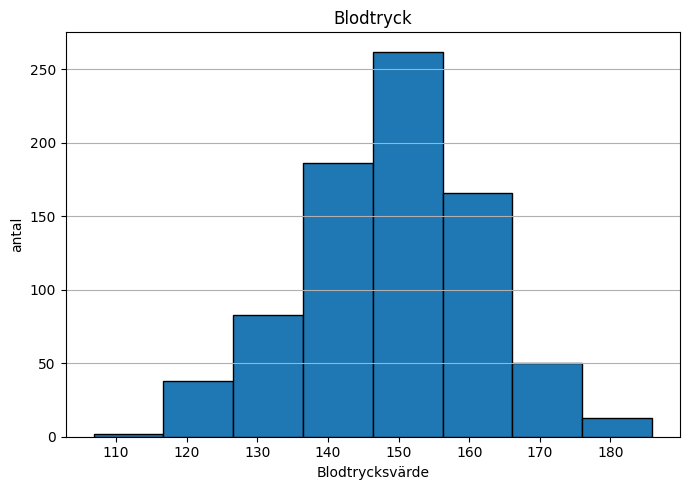

In [6]:
fig, ax = (plt.subplots())
V.histogram(ax, df["systolic_bp"], title = "Blodtryck", xlabel = "Blodtrycksvärde" )
plt.show()

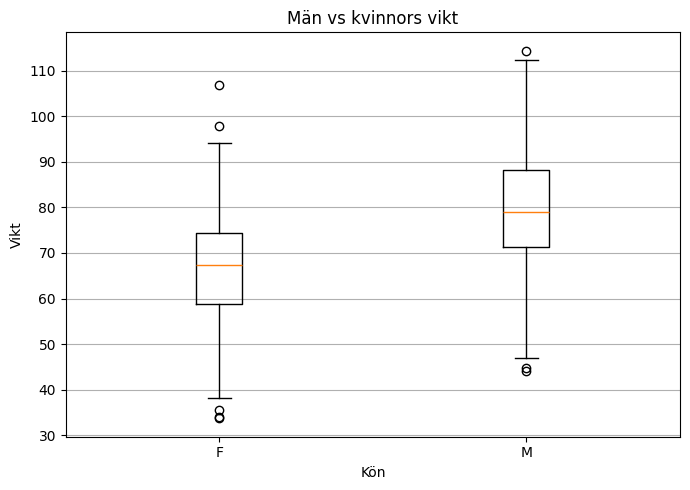

In [7]:
fig, ax = (plt.subplots())
V.boxplot(ax, [df.loc[df.sex == "F", "weight"], df.loc[df.sex == "M", "weight"]], ["F", "M"], "Män vs kvinnors vikt", "Kön", "Vikt")
plt.show()

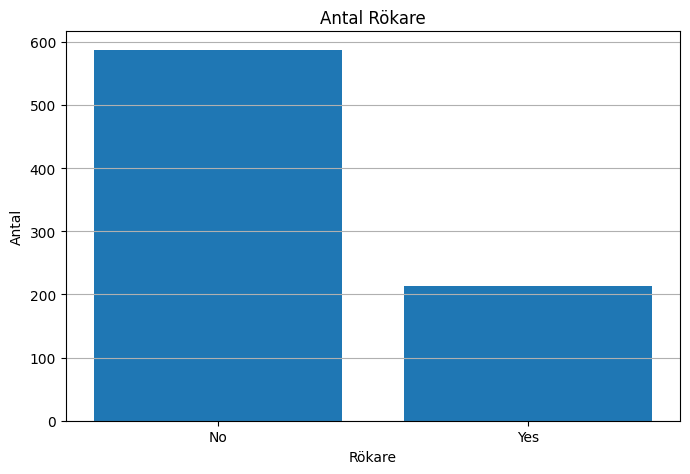

In [8]:
smoker = (df.groupby("smoker", observed= True)["id"]
          .count()
          .reset_index()
          )

fig, ax = plt.subplots()
V.bar(ax, smoker.smoker, smoker.id, "Antal Rökare", "Rökare", "Antal")
plt.tight_layout()
plt.show()

In [9]:
disease = (df.groupby("disease",observed = True)["id"]
           .count()
           .reset_index()
           )

disease

,disease,id
0,0,753
1,1,47
